<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

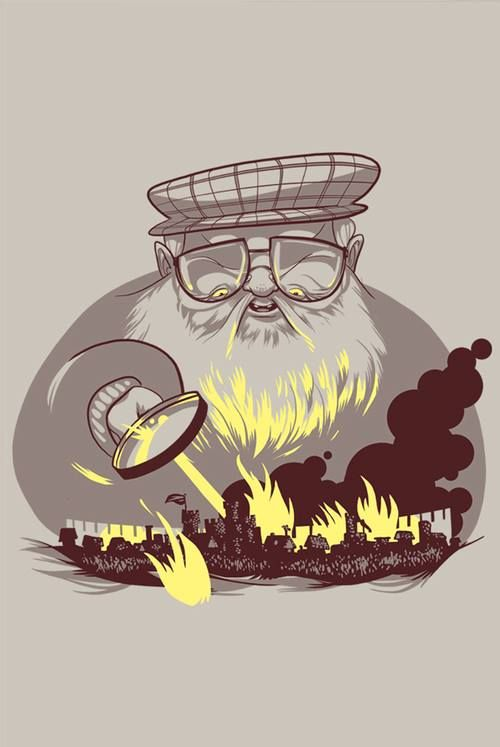

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [355]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 67.0MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [357]:
df = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [359]:
df.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [360]:
df.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse', 'name'], inplace=True) #isAlive очевижно целевая переменнаяЮ ее оставляем для обучения на  train датасете

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             717 non-null    object 
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   dateOfBirth       279 non-null    float64
 4   house             1176 non-null   object 
 5   book1             1557 non-null   int64  
 6   book2             1557 non-null   int64  
 7   book3             1557 non-null   int64  
 8   book4             1557 non-null   int64  
 9   book5             1557 non-null   int64  
 10  isMarried         1557 non-null   int64  
 11  isNoble           1557 non-null   int64  
 12  age               279 non-null    float64
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usag

**Посмотрим, что по ситуации со столбцами, в которых много NaN. Постепенно будем обрабатывать каждый из них.**

**Во-первых, посмотрим на процентное содержание пропущенных значений к общему числу строк**

NaNы в следующих столбах: 

house           381
title           840
culture        1069
dateOfBirth    1278
age            1278
dtype: int64 



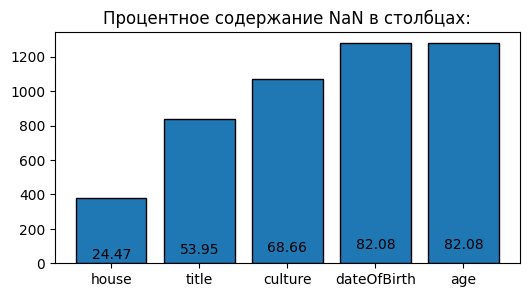

In [362]:
nan_counts = df.isna().sum(axis = 0)
nan_sorted = nan_counts.sort_values()

nan_sorted = nan_sorted[nan_sorted > 0]
print('NaNы в следующих столбах: \n')
print(nan_sorted, '\n')


na_percentage = []

for i in range (len(nan_sorted)):
   na_percentage.append(round(nan_sorted.values[i] / len(df['house']) *100, 2))
#print(na_percentage)


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(6,3))
plt.bar(nan_sorted.index, nan_sorted.values, data = nan_sorted,  linewidth=1.0, edgecolor='k')
plt.title('Процентное содержание NaN в столбцах:')
addlabels(nan_sorted.index, na_percentage)

**1. Столбец house (24.47% NaN):**

   • Пропусков относительно немного, поэтому можем заполнить NaN модой

In [363]:
#df["house"].value_counts().head(5) #из 315 значений эти топ-5 самых часто встречающихся

In [364]:
df['house'] = df['house'].fillna(df['house'].mode()[0])
#print(df['house'].isna().sum()) #все NaN заменили на моду

**2. Столбец title (53.95% NaN):**

   • Здесь уже есть значительное количество пропусков. Заполним пропуски новой категорией "unknown"
   
   Если модель будет плохо обучаться работать с этой переменной,попорбуем ее удалить

In [365]:
df['title'] = df['title'].fillna('unknown')
#print(df['title'].isna().sum()) # все NaN заменили на unknown

**3. Столбец culture (68.658% NaN):**

   • Более 68% пропусков делает этот столбец малопродуктивным для обучения. попробуем их дропнуть.

   Окааааааааазывается, там дальше п 1.4 подсказывает этотпризнак оставить, та что дропнут не получилось

In [366]:
#print(df['culture'].value_counts())
#print(df['culture'].mode())
df['culture'] = df['culture'].fillna('Lostculture')

**4. Обработаем age и dateOfBirth :**

In [367]:
df[['age', 'dateOfBirth', 'isAlive']].head(5)

,age,dateOfBirth,isAlive
S.No,,,
1,NaN,NaN,0
2,97.0,208.0,1
3,NaN,NaN,1
4,23.0,82.0,0
5,29.0,276.0,1


In [368]:
# df.loc[(df['isAlive'] == 1) & (df['dateOfBirth'].isna()) & (df['age'].isna()), 'dateOfBirth']
# пропуски значений одновременоо в dob и age, следовательно, можем удалить колонку с dob

In [369]:
df = df.drop(columns = 'dateOfBirth')

isAlive
0     255
1    1023
Name: count, dtype: int64


Text(0.5, 1.0, 'значение isAlive при NaN в age')

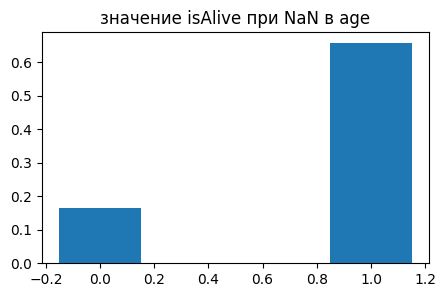

In [370]:
data = df.loc[(df['age'].isna()), 'isAlive'].value_counts().sort_index()

print(data)
plt.figure(figsize=(5,3))
plt.bar(data.index, data.values / len(df['isAlive']*100), width=0.3)
plt.title('значение isAlive при NaN в age')

In [371]:
#df['age'].value_counts()

In [372]:
mean_age = round(np.mean(df['age'].dropna().values), 0)
median_age = np.quantile(df['age'].dropna().values,q=0.5)
mode_age = df['age'].mode()[0]

print(f"Среднее = {mean_age}")
print(f"Медиана = {median_age}")
print(f"Мода = {mode_age}")

Среднее = 35.0
Медиана = 24.0
Мода = 100.0


In [373]:
age_sorted = df['age'].value_counts().sort_index()
#print(age_sorted)


# plt.figure(figsize=(5,3))
# plt.bar(age_sorted.index, age_sorted.values, data = age_sorted,  linewidth=1.0, edgecolor='k')
# plt.title('Распределение количества людей по возрасту')

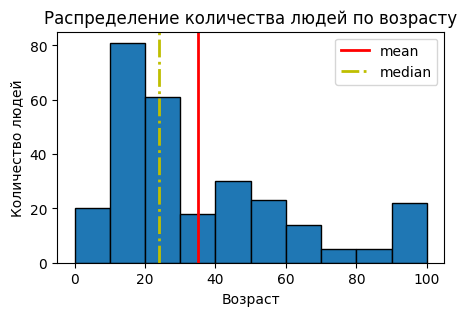

In [374]:
plt.figure(figsize=(5, 3))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.axvline(x=mean_age, color='r', linestyle = '-', linewidth = 2, label = 'mean')
plt.axvline(x=median_age, color='y', linestyle = '-.', linewidth = 2, label='median')

plt.title('Распределение количества людей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend()

plt.show()

In [375]:
df['age'] = df['age'].fillna(mean_age)

## Чето как-*то* непонятно

In [376]:
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10))

# grouped_data = df.groupby([age_bins, 'isAlive']).size().unstack()
# #grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# bar_width = 0.4  # Ширина каждого столбца
# r1 = range(len(grouped_data))  # Положение первой группы столбцов
# r2 = [x + bar_width for x in r1]  # Положение второй группы столбцов

# # 4. Построение grouped bar chart
# plt.bar(r1, grouped_data[0], color='blue', width=bar_width, edgecolor='grey', label='Not Alive (0)')
# plt.bar(r2, grouped_data[1], color='orange', width=bar_width, edgecolor='grey', label='Alive (1)')

# # Настройка меток на оси X
# plt.xlabel('Возрастная группа', fontweight='bold')
# plt.xticks([r + bar_width / 2 for r in range(len(grouped_data))], grouped_data.index, rotation=45)

# # Добавляем заголовок и легенду
# plt.title('Влияние возраста на выживание')
# plt.ylabel('Количество персонажей')
# plt.legend()

# # Показать график
# plt.show()

In [377]:
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10))

# grouped_data = df.groupby([age_bins, 'isAlive']).size().unstack()

# grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# grouped_data.plot(kind='bar', stacked=True)

# # Настройка графика
# plt.title('Влияние возраста на выживание')
# plt.xlabel('Возрастная группа')
# plt.ylabel('Доля персонажей')
# plt.legend(title='isAlive')

# # Показать график
# plt.show()

In [378]:
# df['age'] = df['age'].fillna(mean_age)

In [379]:
# plt.figure(figsize=(5, 3))
# plt.hist(df['age'], bins=10, edgecolor='black')
# plt.axvline(x=mean_age, color='r', linestyle = '-', linewidth = 2, label = 'mean')
# plt.axvline(x=median_age, color='y', linestyle = '-.', linewidth = 2, label='median')

# # Настройка заголовков и подписей
# plt.title('Распределение количества людей по возрасту')
# plt.xlabel('Возраст')
# plt.ylabel('Количество людей')

# # Показать график
# plt.show()

In [380]:
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10))

# grouped_data = df.groupby([age_bins, 'isAlive']).size().unstack()
# #grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# bar_width = 0.4  # Ширина каждого столбца
# r1 = range(len(grouped_data))  # Положение первой группы столбцов
# r2 = [x + bar_width for x in r1]  # Положение второй группы столбцов

# # 4. Построение grouped bar chart
# plt.bar(r1, grouped_data[0], color='blue', width=bar_width, edgecolor='grey', label='Not Alive (0)')
# plt.bar(r2, grouped_data[1], color='orange', width=bar_width, edgecolor='grey', label='Alive (1)')

# # Настройка меток на оси X
# plt.xlabel('Возрастная группа', fontweight='bold')
# plt.xticks([r + bar_width / 2 for r in range(len(grouped_data))], grouped_data.index, rotation=45)

# # Добавляем заголовок и легенду
# plt.title('Влияние возраста на выживание (группированные столбцы)')
# plt.ylabel('Количество персонажей')
# plt.legend()

# # Показать график
# plt.show()


In [381]:
# # Создаем категории для возрастов с шагом в 10 лет (0-10, 10-20, ..., 90-100)
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10), right=False)

# # Применяем one-hot кодирование
# one_hot_encoded = pd.get_dummies(age_bins)
# one_hot_encoded = one_hot_encoded.astype(int)

In [382]:
# one_hot_encoded

In [383]:
# # Добавляем эти новые столбцы к исходному DataFrame (если нужно)
# df = pd.concat([df, one_hot_encoded], axis=1)

In [384]:
# df = df.drop(columns = 'age')

In [385]:
# df.info()

## Теперь понятно

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   object 
 1   male              1557 non-null   int64  
 2   culture           1557 non-null   object 
 3   house             1557 non-null   object 
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               1557 non-null   float64
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
 14  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 194.6+ KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [387]:
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

for i in range(len(object_columns)):
  print(object_columns[i], df[object_columns[i]].nunique())

Index(['title', 'culture', 'house'], dtype='object')
title 196
culture 52
house 315


In [388]:
#df['popularity']

In [389]:
threshold = 0.5

df['isPopular'] = df['popularity'].apply(lambda x: 1 if x > threshold else 0)

#df[['name', 'popularity', 'isPopular']].head()
df = df.drop(columns = 'popularity')

In [390]:
df['numDeadRelations'].unique()

array([11,  1,  0,  5,  3, 12, 10,  7,  4,  6, 15,  8,  2,  9])

In [391]:
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda y : 1 if y > 0 else 0)

#df[['boolDeadRelations', 'numDeadRelations']].sample(10)
df.head(10)
pd.concat([df, df['boolDeadRelations']], axis = 1)
df = df.drop(columns = 'numDeadRelations')

In [392]:
df['culture'].nunique()

52

In [393]:
df['culture'].unique()

array(['Lostculture', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [394]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(culture):
    if pd.isna(culture):  # если значение NaN, возвращаем его как есть
        return culture
    #culture = culture.lower()  # Приводим к нижнему регистру для единообразия
    for key, values in cult.items():
       if culture.lower() in values:  # Проверяем, если culture есть в списке значений
            return key  # Возвращаем ключ из словаря как новое значение
    return culture  # Если не нашли в словаре, возвращаем исходное значение

# Применяем функцию к столбцу 'culture'
df['culture'] = df['culture'].apply(simplify_culture)

# Проверим уникальные значения после замены
print(df['culture'].unique())

['Lostculture' 'Rivermen' 'Dornish' 'Valyrian' 'Ironborn' 'Free Folk'
 'Northmen' 'Summer Islands' 'Braavosi' 'Dothraki' 'Ghiscari'
 'Vale mountain clans' 'Reach' 'Tyroshi' 'Lhazarene' 'Ironmen' 'Qartheen'
 'Lysene' 'Westermen' 'Qohor' 'Westerosi' 'Norvoshi' 'Meereenese' 'Andal'
 'Astapori' 'ironborn' 'Stormlander' 'Valemen' 'Myrish' 'Lhazareen'
 'Sistermen' 'Northern mountain clans' 'Vale' 'Crannogmen' 'Pentoshi']


In [395]:
print(df['culture'].nunique()) # как будто бы можем использовать Obe-hot encoding. Вопрос релевантно ли это rn все еще уместен

35


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [396]:
#data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [397]:
class_distribution = df['isAlive'].value_counts()
class_distribution = class_distribution.sort_index()
print(class_distribution)

isAlive
0     345
1    1212
Name: count, dtype: int64


In [398]:
na_percentage = []

for i in range (len(class_distribution)):
   na_percentage.append(round(class_distribution.values[i] / len(df['isAlive']) *100, 2))
print(na_percentage)


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

[22.16, 77.84]


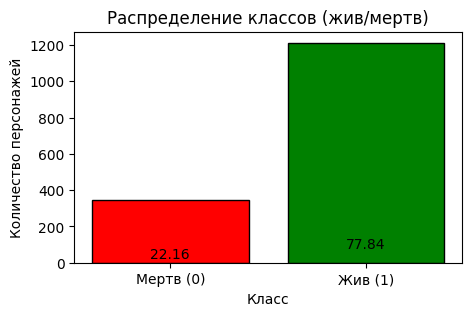

In [399]:
plt.figure(figsize=(5, 3))
plt.bar(class_distribution.index, class_distribution.values, color=['red', 'green'], edgecolor='k' )
plt.title('Распределение классов (жив/мертв)')
plt.xlabel('Класс')
plt.ylabel('Количество персонажей')
plt.xticks(ticks=[0, 1], labels=['Мертв (0)', 'Жив (1)'])


addlabels(class_distribution.index, na_percentage)

plt.show()

Дисбалланс есть a little bit, попрообуем это решить большими весами у dead ppl

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [400]:
data = df.drop(columns = ['book1', 'book2', 'book3', 'book4', 'book5'])

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   house              1557 non-null   object 
 4   isMarried          1557 non-null   int64  
 5   isNoble            1557 non-null   int64  
 6   age                1557 non-null   float64
 7   isAlive            1557 non-null   int64  
 8   isPopular          1557 non-null   int64  
 9   boolDeadRelations  1557 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 133.8+ KB


<Axes: >

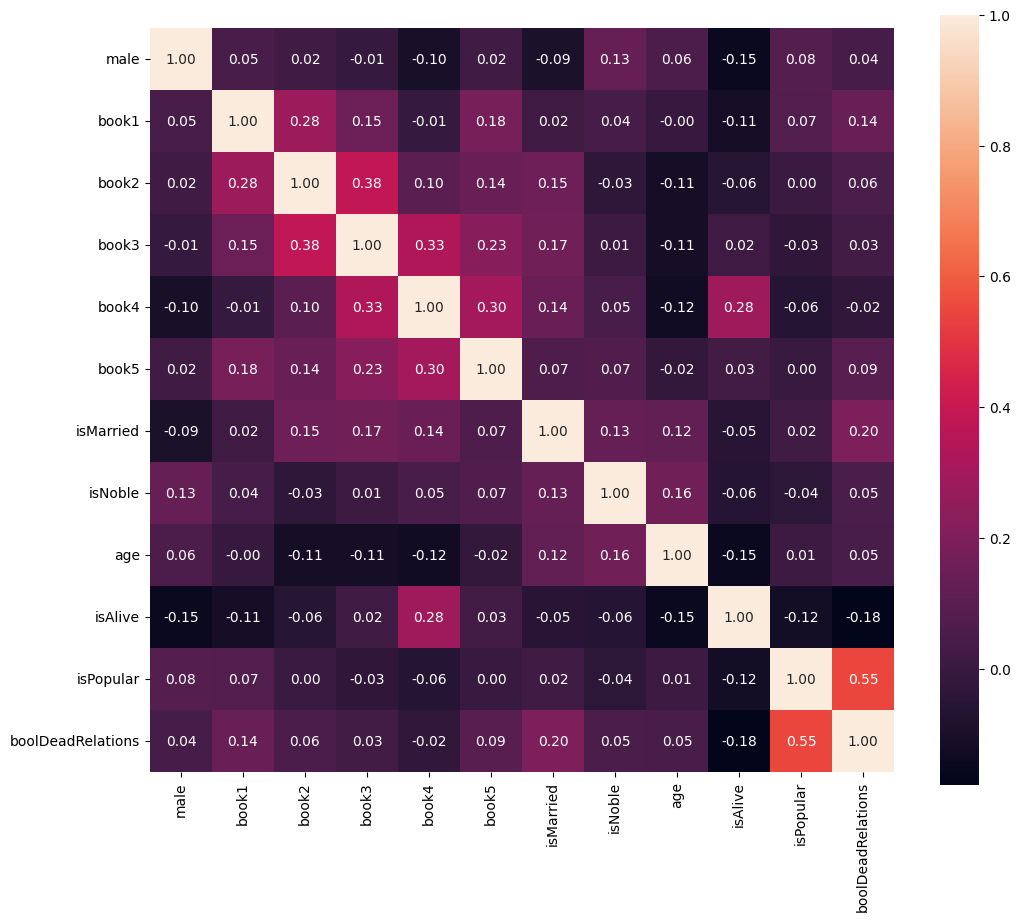

In [402]:
corrmat = df.corr(numeric_only = True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, annot=True, fmt=".2f", square=True)

In [403]:
df['culture'].value_counts() # title, culture, house - type object
culture = df['culture'].value_counts()

rare_culture = culture[culture < 40].index # 40
df['culture'] = df['culture'].apply(lambda x: 'Rare Culture' if x in rare_culture else x)
df['culture'].value_counts()

,count
culture,
Lostculture,1069
Rare Culture,198
Northmen,103
Ironborn,91
Free Folk,56
Braavosi,40


In [404]:
one_hot_culture = (pd.get_dummies(df['culture'], drop_first=True)).astype(int)
df = pd.concat([df, one_hot_culture], axis=1)

one_hot_culture.columns
#df = df.drop('culture', axis=1)

Index(['Free Folk', 'Ironborn', 'Lostculture', 'Northmen', 'Rare Culture'], dtype='object')

In [405]:
df = df.drop('culture', axis = 1)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   house              1557 non-null   object 
 3   book1              1557 non-null   int64  
 4   book2              1557 non-null   int64  
 5   book3              1557 non-null   int64  
 6   book4              1557 non-null   int64  
 7   book5              1557 non-null   int64  
 8   isMarried          1557 non-null   int64  
 9   isNoble            1557 non-null   int64  
 10  age                1557 non-null   float64
 11  isAlive            1557 non-null   int64  
 12  isPopular          1557 non-null   int64  
 13  boolDeadRelations  1557 non-null   int64  
 14  Free Folk          1557 non-null   int64  
 15  Ironborn           1557 non-null   int64  
 16  Lostculture        1557 non-n

In [407]:
print(df['house'].nunique())

315


In [408]:
df['house'].value_counts()

,count
house,
House Frey,470
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
House Celtigar,1
House of Ghazeen,1
House Byrch,1


In [409]:
df['house'].value_counts() # title, culture, house - type object
house = df['house'].value_counts()

rare_house = house[house < 40].index # 40
df['house'] = df['house'].apply(lambda x: 'Rare House' if x in rare_house else x)
df['house'].value_counts()
#house

,count
house,
Rare House,903
House Frey,470
Night's Watch,88
House Stark,56
House Targaryen,40


In [410]:
one_hot_house = (pd.get_dummies(df['house'], drop_first=True)).astype(int)
df = pd.concat([df, one_hot_house], axis=1)

one_hot_house.columns

Index(['House Stark', 'House Targaryen', 'Night's Watch', 'Rare House'], dtype='object')

In [411]:
df = df.drop('house', axis=1)

Приказываю упарзднить title

In [412]:
df['title'].value_counts() #name, title, culture, house - type object
title = df['title'].value_counts()

rare_titles = title[title < 20].index # 20
df['title'] = df['title'].apply(lambda x: 'unique' if x in rare_titles else x)
df['title'].value_counts()

,count
title,
unknown,840
unique,361
Ser,306
Maester,29
Archmaester,21


In [413]:
one_hot_title = (pd.get_dummies(df['title'], drop_first=True)).astype(int)
df = pd.concat([df, one_hot_title], axis = 1)
one_hot_title.columns

Index(['Maester', 'Ser', 'unique', 'unknown'], dtype='object')

In [414]:
df = df.drop(columns = 'title')

In [415]:
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10))

# grouped_data = df.groupby([age_bins, 'isAlive']).size().unstack()
# #grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# bar_width = 0.4  # Ширина каждого столбца
# r1 = range(len(grouped_data))  # Положение первой группы столбцов
# r2 = [x + bar_width for x in r1]  # Положение второй группы столбцов

# plt.bar(r1, grouped_data[0], color='blue', width=bar_width, edgecolor='grey', label='Not Alive (0)')
# plt.bar(r2, grouped_data[1], color='orange', width=bar_width, edgecolor='grey', label='Alive (1)')

# # Настройка меток на оси X
# plt.xlabel('Возрастная группа', fontweight='bold')
# plt.xticks([r + bar_width / 2 for r in range(len(grouped_data))], grouped_data.index, rotation=45)

# plt.title('Влияние возраста на выживание')
# plt.ylabel('Количество персонажей')
# plt.legend()

# plt.show()

In [416]:
age_bins = pd.cut(df['age'],
                  bins=[0, 10, 20, 30, 40, 50, 60, 70, 110],  # Новые границы категорий
                  labels=['[0;10)', '[10;20)', '[20; 30)', '[30; 40)', '[40; 50)', '[50; 60)', '[60; 70)', 'old [70; 100]'],
                  right=False)

age_bins.value_counts()

,count
age,
[30; 40),1296
[10;20),81
[20; 30),61
old [70; 100],32
[40; 50),30
[50; 60),23
[0;10),20
[60; 70),14


In [417]:
# # Создаем категории для возрастов с шагом в 10 лет (0-10, 10-20, ..., 90-100)
# age_bins = pd.cut(df['age'], bins=range(0, 110, 10), right=False)

# age_bins.value_counts()

In [418]:
one_hot_age = (pd.get_dummies(age_bins, drop_first=True)).astype(int)
df = pd.concat([df, one_hot_age], axis=1)
df = df.drop('age', axis=1)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   male               1557 non-null   int64
 1   book1              1557 non-null   int64
 2   book2              1557 non-null   int64
 3   book3              1557 non-null   int64
 4   book4              1557 non-null   int64
 5   book5              1557 non-null   int64
 6   isMarried          1557 non-null   int64
 7   isNoble            1557 non-null   int64
 8   isAlive            1557 non-null   int64
 9   isPopular          1557 non-null   int64
 10  boolDeadRelations  1557 non-null   int64
 11  Free Folk          1557 non-null   int64
 12  Ironborn           1557 non-null   int64
 13  Lostculture        1557 non-null   int64
 14  Northmen           1557 non-null   int64
 15  Rare Culture       1557 non-null   int64
 16  House Stark        1557 non-null   int64
 17  House Targaryen    

In [420]:
# data = df.drop(columns = ['book1', 'book2', 'book3', 'book4', 'book5'])

In [421]:
# corrmat = data.corr(numeric_only = True)
# f, ax = plt.subplots(figsize=(8, 6))
# sns.heatmap(corrmat)

In [422]:
corr_pairs = corrmat.stack()

strong_corr_pairs = corr_pairs[(corr_pairs > 0.55) & (corr_pairs < 1)]

print(strong_corr_pairs)

Series([], dtype: float64)


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [423]:
corr_with_target = df.corr(numeric_only=True)['isAlive'].sort_values(ascending=False)
print(corr_with_target)

isAlive              1.000000
book4                0.284014
[30; 40)             0.100055
Ironborn             0.067003
Rare House           0.056670
unknown              0.056242
Maester              0.039186
book5                0.032531
book3                0.018427
[10;20)              0.013565
Lostculture          0.009564
[60; 70)             0.001673
Northmen            -0.001103
Ser                 -0.004657
House Stark         -0.004913
[40; 50)            -0.015217
[20; 30)            -0.019796
[50; 60)            -0.024403
Free Folk           -0.029828
isMarried           -0.049381
book2               -0.055998
isNoble             -0.060572
Rare Culture        -0.079501
unique              -0.091647
book1               -0.112468
isPopular           -0.118673
Night's Watch       -0.123900
male                -0.148290
boolDeadRelations   -0.178177
House Targaryen     -0.187057
old [70; 100]       -0.195209
Name: isAlive, dtype: float64


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [424]:
X = df.drop(columns=['isAlive']).values
y = df['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [427]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [428]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [429]:
# Импорт необходимых библиотек
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_logistic = logistic_regression.predict(X_test)


# 1. Точность
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy:.2f}')

# 2. Подробный отчет о классификации
report = classification_report(y_test, y_pred_logistic)
print('Classification Report:\n', report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.34      0.45        61
           1       0.86      0.95      0.90       251

    accuracy                           0.83       312
   macro avg       0.75      0.65      0.67       312
weighted avg       0.81      0.83      0.81       312



Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

**Random Forest Classifier**

In [430]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_rf)
print('Classification Report:\n', report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        61
           1       0.88      0.92      0.90       251

    accuracy                           0.83       312
   macro avg       0.74      0.70      0.71       312
weighted avg       0.82      0.83      0.83       312



**Ada Boost Classifier**

In [431]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Точность модели : {accuracy:.4f}")

print("Отчет по классификации:")
print(classification_report(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Точность модели : 0.8237
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.57      0.38      0.46        61
           1       0.86      0.93      0.89       251

    accuracy                           0.82       312
   macro avg       0.72      0.65      0.68       312
weighted avg       0.80      0.82      0.81       312



**Gaussian Process Classifier**

In [432]:
gp_classifier = GaussianProcessClassifier(random_state=42)
gp_classifier.fit(X_train, y_train)
y_pred_gp = gp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gp)
print(f"Точность модели: {accuracy:.4f}")

print("Отчет по классификации:")
print(classification_report(y_test, y_pred_gp))

Точность модели: 0.8429
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.88      0.23      0.36        61
           1       0.84      0.99      0.91       251

    accuracy                           0.84       312
   macro avg       0.86      0.61      0.64       312
weighted avg       0.85      0.84      0.80       312



**GaussianNB**

In [433]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Точность модели : {accuracy:.4f}")

print("Отчет по классификации:")
print(classification_report(y_test, y_pred_nb))

Точность модели : 0.7468
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        61
           1       0.85      0.83      0.84       251

    accuracy                           0.75       312
   macro avg       0.61      0.62      0.61       312
weighted avg       0.76      0.75      0.75       312



**KNeighborsClassifier**

In [434]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Точность модели KNeighborsClassifier: {accuracy_knn:.4f}")

print("Отчет по классификации KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))

Точность модели KNeighborsClassifier: 0.8109
Отчет по классификации KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        61
           1       0.86      0.91      0.89       251

    accuracy                           0.81       312
   macro avg       0.69      0.66      0.67       312
weighted avg       0.80      0.81      0.80       312



**SVC**

In [435]:
svc_classifier = SVC(kernel='linear', C=1)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Точность модели SVC: {accuracy_svc:.4f}")

print("Отчет по классификации SVC:")
print(classification_report(y_test, y_pred_svc))

Точность модели SVC: 0.8237
Отчет по классификации SVC:
              precision    recall  f1-score   support

           0       0.65      0.21      0.32        61
           1       0.84      0.97      0.90       251

    accuracy                           0.82       312
   macro avg       0.74      0.59      0.61       312
weighted avg       0.80      0.82      0.79       312



**DecisionTreeClassifier**

In [436]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Точность модели DecisionTreeClassifier: {accuracy_tree:.4f}")

print("Отчет по классификации DecisionTreeClassifier:")
print(classification_report(y_test, y_pred_tree))

Точность модели DecisionTreeClassifier: 0.8109
Отчет по классификации DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        61
           1       0.89      0.88      0.88       251

    accuracy                           0.81       312
   macro avg       0.70      0.71      0.70       312
weighted avg       0.81      0.81      0.81       312



## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [437]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [438]:
results = {
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Ada Boost Classifier',
              'Gaussian Process Classifier', 'Gaussian NB', 'KNeighbors Classifier',
              'SVC', 'Decision Tree Classifier'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logistic),   # Logistic Regression
        accuracy_score(y_test, y_pred_rf),         # RandomForestClassifier
        accuracy_score(y_test, y_pred_ada),        # AdaBoostClassifier
        accuracy_score(y_test, y_pred_gp),         # GaussianProcessClassifier
        accuracy_score(y_test, y_pred_nb),         # GaussianNB
        accuracy_score(y_test, y_pred_knn),        # KNeighborsClassifier
        accuracy_score(y_test, y_pred_svc),        # SVC
        accuracy_score(y_test, y_pred_tree)        # DecisionTreeClassifier
    ]
}

df_results = pd.DataFrame(results)

In [439]:
df_results

,Model,Accuracy
0,Logistic Regression,0.833333
1,Random Forest Classifier,0.833333
2,Ada Boost Classifier,0.823718
3,Gaussian Process Classifier,0.842949
4,Gaussian NB,0.746795
5,KNeighbors Classifier,0.810897
6,SVC,0.823718
7,Decision Tree Classifier,0.810897


In [440]:
best_index = df_results['Accuracy'].idxmax()
best_model_row = df_results.loc[best_index]
print(f"Лучшая модель: {best_model_row['Model']} с точностью: {best_model_row['Accuracy']:.4f}")


Лучшая модель: Gaussian Process Classifier с точностью: 0.8429


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [441]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.0MB/s]


In [442]:
df_test = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

In [443]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [444]:
df_test.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse', 'name'], inplace=True)

In [445]:
df_test['house'] = df_test['house'].fillna(df_test['house'].mode()[0])
df_test['title'] = df_test['title'].fillna('unknown')
df_test['culture'] = df_test['culture'].fillna('Lostculture')

In [446]:
df_test = df_test.drop(columns = 'dateOfBirth')

In [447]:
df_test['age'] = df_test['age'].fillna(mean_age)

In [448]:
threshold = 0.5

df_test['isPopular'] = df_test['popularity'].apply(lambda x: 1 if x > threshold else 0)

#df[['name', 'popularity', 'isPopular']].head()
df_test = df_test.drop(columns = 'popularity')

In [449]:
df_test['boolDeadRelations'] = df_test['numDeadRelations'].apply(lambda y : 1 if y > 0 else 0)

#df[['boolDeadRelations', 'numDeadRelations']].sample(10)
df_test.head(10)
pd.concat([df_test, df_test['boolDeadRelations']], axis = 1)
df_test = df_test.drop(columns = 'numDeadRelations')

In [450]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(culture):
    if pd.isna(culture):
        return culture
    for key, values in cult.items():
       if culture.lower() in values:
            return key
    return culture
df_test['culture'] = df_test['culture'].apply(simplify_culture)

In [451]:
df_test['culture'].value_counts() # title, culture, house - type object
culture = df_test['culture'].value_counts()

rare_culture = culture[culture < 40].index # 40
df_test['culture'] = df_test['culture'].apply(lambda x: 'Rare Culture' if x in rare_culture else x)

In [452]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    object 
 1   male               389 non-null    int64  
 2   culture            389 non-null    object 
 3   house              389 non-null    object 
 4   book1              389 non-null    int64  
 5   book2              389 non-null    int64  
 6   book3              389 non-null    int64  
 7   book4              389 non-null    int64  
 8   book5              389 non-null    int64  
 9   isMarried          389 non-null    int64  
 10  isNoble            389 non-null    int64  
 11  age                389 non-null    float64
 12  isPopular          389 non-null    int64  
 13  boolDeadRelations  389 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 45.6+ KB


In [453]:
rare_culture

Index(['Northmen', 'Ironborn', 'Dornish', 'Valyrian', 'Free Folk', 'Westerosi',
       'Rivermen', 'Valemen', 'Ghiscari', 'Dothraki', 'Reach', 'Lysene',
       'Stormlander', 'Westermen', 'Asshai', 'Braavosi', 'Vale mountain clans',
       'Pentoshi', 'Riverlands', 'Northern mountain clans', 'Ironmen',
       'Wildlings', 'Crannogmen', 'Lhazareen', 'Qartheen', 'Myrish',
       'Ibbenese', 'Astapor', 'Qohor', 'Norvoshi', 'Tyroshi', 'Meereen',
       'Rhoynar', 'Meereenese', 'Naathi', 'Summer Islands'],
      dtype='object', name='culture')

In [454]:
culture_train_columns = one_hot_culture.columns

# Применяем one-hot кодирование на тестовом наборе
one_hot_culture_test = (pd.get_dummies(df_test['culture'], drop_first=True)).astype(int)

# Добавляем недостающие столбцы с нулями для тестового набора
for col in culture_train_columns:
    if col not in one_hot_culture_test:
        one_hot_culture_test[col] = 0

# Убедитесь, что порядок столбцов одинаков
one_hot_culture_test = one_hot_culture_test[culture_train_columns]

# Объединяем с тестовым набором данных
df_test = pd.concat([df_test, one_hot_culture_test], axis=1)

In [455]:
culture_train_columns

Index(['Free Folk', 'Ironborn', 'Lostculture', 'Northmen', 'Rare Culture'], dtype='object')

Index(['Free Folk', 'Ironborn', 'Lostculture', 'Northmen', 'Rare Culture'], dtype='object')

In [456]:
# one_hot_culture = (pd.get_dummies(df_test['culture'], drop_first=True)).astype(int)
# df_test = pd.concat([df_test, one_hot_culture], axis=1)

In [457]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    object 
 1   male               389 non-null    int64  
 2   culture            389 non-null    object 
 3   house              389 non-null    object 
 4   book1              389 non-null    int64  
 5   book2              389 non-null    int64  
 6   book3              389 non-null    int64  
 7   book4              389 non-null    int64  
 8   book5              389 non-null    int64  
 9   isMarried          389 non-null    int64  
 10  isNoble            389 non-null    int64  
 11  age                389 non-null    float64
 12  isPopular          389 non-null    int64  
 13  boolDeadRelations  389 non-null    int64  
 14  Free Folk          389 non-null    int64  
 15  Ironborn           389 non-null    int64  
 16  Lostculture        389 non-

In [458]:
df_test['house'].value_counts() # title, culture, house - type object
house = df_test['house'].value_counts()

rare_house = house[house < 40].index # 40
df_test['house'] = df_test['house'].apply(lambda x: 'Rare House' if x in rare_house else x)
df_test['house'].value_counts()
#house

,count
house,
Rare House,321
House Targaryen,68


In [459]:
# Получаем список категорий (столбцов), которые были закодированы в тренировочном наборе
house_train_columns = one_hot_house.columns

# Применяем one-hot кодирование на тестовом наборе
one_hot_house_test = (pd.get_dummies(df_test['house'], drop_first=True)).astype(int)

# Добавляем недостающие столбцы с нулями для тестового набора
for col in house_train_columns:
    if col not in one_hot_house_test:
        one_hot_house_test[col] = 0

# Убедитесь, что порядок столбцов одинаков
one_hot_house_test = one_hot_house_test[house_train_columns]

# Объединяем с тестовым набором данных
df_test = pd.concat([df_test, one_hot_house_test], axis=1)

In [460]:
house_train_columns

Index(['House Stark', 'House Targaryen', 'Night's Watch', 'Rare House'], dtype='object')

Index(['House Stark', 'House Targaryen', 'Night's Watch', 'Rare House'], dtype='object')

In [461]:
# one_hot_house = (pd.get_dummies(df_test['house'], drop_first=True)).astype(int)
# df_test = pd.concat([df_test, one_hot_house], axis=1)

In [462]:
df_test['title'].value_counts()
title = df_test['title'].value_counts()

rare_titles = title[title < 20].index # 20
df_test['title'] = df_test['title'].apply(lambda x: 'unique' if x in rare_titles else x)
#df_test['title'].value_counts()

In [463]:
title_train_columns = one_hot_title.columns

one_hot_title_test = (pd.get_dummies(df_test['title'], drop_first=True)).astype(int)

# Добавляем недостающие столбцы
for col in title_train_columns:
    if col not in one_hot_title_test:
        one_hot_title_test[col] = 0

# Выравниваем столбцы
one_hot_title_test = one_hot_title_test[title_train_columns]

# Объединяем с тестовым набором данных
df_test = pd.concat([df_test, one_hot_title_test], axis=1)

In [464]:
title_train_columns

Index(['Maester', 'Ser', 'unique', 'unknown'], dtype='object')

Index(['Maester', 'Ser', 'unique', 'unknown'], dtype='object')

In [465]:
# one_hot_title = (pd.get_dummies(df_test['title'], drop_first=True)).astype(int)
# df_test = pd.concat([df_test, one_hot_title], axis = 1)

In [466]:
df_test = df_test.drop('title', axis = 1)
df_test = df_test.drop('house', axis = 1)
df_test = df_test.drop('culture', axis = 1)

In [467]:
age_bins = pd.cut(df_test['age'],
                  bins=[0, 10, 20, 30, 40, 50, 60, 70, 110],  # Новые границы категорий
                  labels=['[0;10)', '[10;20)', '[20; 30)', '[30; 40)', '[40; 50)', '[50; 60)', '[60; 70)', 'old [70; 100]'],
                  right=False)

# age_bins.value_counts()

In [468]:
one_hot_age = (pd.get_dummies(age_bins, drop_first=True)).astype(int)
df_test = pd.concat([df_test, one_hot_age], axis=1)
df_test = df_test.drop('age', axis=1)


In [469]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   male               389 non-null    int64
 1   book1              389 non-null    int64
 2   book2              389 non-null    int64
 3   book3              389 non-null    int64
 4   book4              389 non-null    int64
 5   book5              389 non-null    int64
 6   isMarried          389 non-null    int64
 7   isNoble            389 non-null    int64
 8   isPopular          389 non-null    int64
 9   boolDeadRelations  389 non-null    int64
 10  Free Folk          389 non-null    int64
 11  Ironborn           389 non-null    int64
 12  Lostculture        389 non-null    int64
 13  Northmen           389 non-null    int64
 14  Rare Culture       389 non-null    int64
 15  House Stark        389 non-null    int64
 16  House Targaryen    389 non-null    int64
 17  Night's Watch    

In [472]:
X_test = df_test.values

y_pred_test = gp_classifier.predict(X_test)

# Выводим предсказанные значения для isAlive
print(y_pred_test)

# Теперь можно добавить предсказания в ваш тестовый DataFrame
df_test['isAlive'] = y_pred_test

# Сохраняем результат в CSV файл
df_test.to_csv('df_test_with_isAlive_predictions.csv', index=False)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


In [476]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [477]:
submission['isAlive'] = y_pred_test

submission.to_csv('submission.csv', index=True)

In [478]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [479]:
submission.to_csv("/content/new_submission.csv", index=False)